<a href="https://colab.research.google.com/github/joohoshin/TensorflowAI/blob/main/15_3_Tansfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

마스크 착용여부를 확인하는 모델을 만들어봅시다

https://www.kaggle.com/prithwirajmitra/covid-face-mask-detection-dataset

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
data_dir = '/content/drive/MyDrive/Tensorflow AI/New Masks Dataset'
img_height = 150
img_width = 150

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir+'/Train',    
  image_size=(img_height, img_width))

Found 600 files belonging to 2 classes.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir+'/Validation',    
  image_size=(img_height, img_width))

Found 306 files belonging to 2 classes.


In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir+'/Test',    
  image_size=(img_height, img_width))

Found 100 files belonging to 2 classes.


pretrained model을 불러와봅시다

https://www.tensorflow.org/api_docs/python/tf/keras/applications

In [ ]:
from tensorflow.keras.applications import VGG16
vgg_model = VGG16(weights = 'imagenet',include_top=False, input_shape=(150,150,3))

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [ ]:
vgg_res = vgg_model.predict(train_ds)

In [ ]:
type(vgg_res)

numpy.ndarray

In [ ]:
vgg_res.shape

(600, 4, 4, 512)

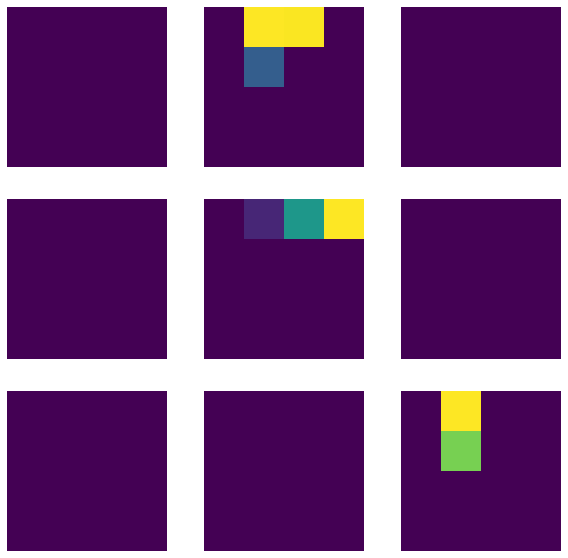

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(vgg_res[0,:,:,i])
    
    plt.axis("off")

In [ ]:
vgg_model.trainable = False

In [ ]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [ ]:
from tensorflow.keras import Sequential, Model, layers
transfer_model = Sequential()

In [ ]:
transfer_model.add(vgg_model)

In [ ]:
transfer_model.add(layers.Flatten())
transfer_model.add(layers.Dense(256,activation='relu'))
transfer_model.add(layers.Dropout(0.5))
transfer_model.add(layers.Dense(1,activation='sigmoid'))

transfer_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
transfer_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
history = transfer_model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
19/19 [==============================] - 303s 16s/step - loss: 5.2774 - acc: 0.8209 - val_loss: 1.6456 - val_acc: 0.9477
Epoch 2/10
19/19 [==============================] - 202s 11s/step - loss: 0.9924 - acc: 0.9766 - val_loss: 1.3348 - val_acc: 0.9673
Epoch 3/10
19/19 [==============================] - 202s 11s/step - loss: 0.2682 - acc: 0.9909 - val_loss: 0.8772 - val_acc: 0.9673
Epoch 4/10
19/19 [==============================] - 202s 11s/step - loss: 0.0962 - acc: 0.9935 - val_loss: 0.8400 - val_acc: 0.9706
Epoch 5/10
19/19 [==============================] - 203s 11s/step - loss: 0.0470 - acc: 0.9968 - val_loss: 0.9567 - val_acc: 0.9641
Epoch 6/10
19/19 [==============================] - 203s 11s/step - loss: 0.2042 - acc: 0.9914 - val_loss: 1.1715 - val_acc: 0.9608
Epoch 7/10
19/19 [==============================] - 208s 11s/step - loss: 0.0662 - acc: 0.9976 - val_loss: 1.0487 - val_acc: 0.9673
Epoch 8/10
19/19 [==============================] - 204s 11s/step - loss: 0.

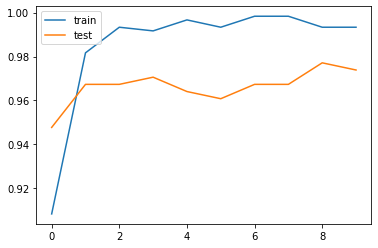

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['train', 'test'], loc='upper left')